In [20]:
# importing librarries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns

uint8
(500, 500)


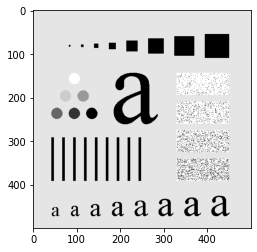

In [21]:
img= cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif', 0)

print(img.dtype)

print(img.shape)

plt.imshow(img, cmap = 'gray', vmin= 0,vmax=256)

In [22]:
img_fft= np.fft.fft2(img, s=None, axes=(-2, -1), norm=None)

In [23]:
img_fft= np.fft.fftshift(img_fft)

In [24]:
m,n = img_fft.shape

In [25]:
lpf= img.copy()
hpf= img.copy()

d0 = 60

for i in range(m) :
  for j in range(n) :
    d1= np.sqrt((i-m//2)**2 + (j-n//2)**2)
    if d1>d0:
      lpf[i,j]=0
      hpf[i,j]=1
    else:
      lpf[i,j]=1
      hpf[i,j]=0

img_lpf = img_fft*lpf
img_lpf= np.fft.fftshift(img_lpf)
img_new_lpf= np.real(np.fft.ifft2(img_lpf))

img_hpf= img_fft*hpf
img_hpf = np.fft.fftshift(img_hpf)
img_new_hpf=np.real(np.fft.ifft2(img_hpf))

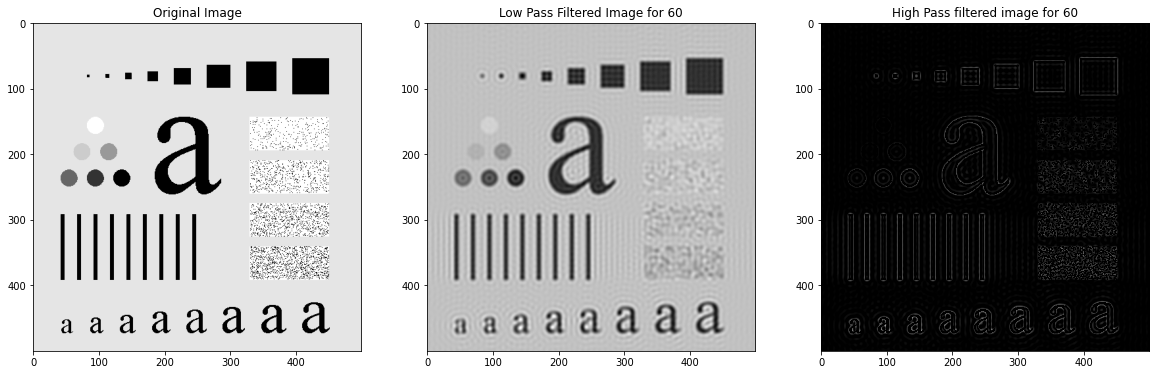

In [26]:
plt.figure(figsize=(20,20))
plt.subplot (1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")

plt.subplot (1,3,2)
plt.title("Low Pass Filtered Image for 60")
plt.imshow(img_new_lpf, cmap= "gray")

plt.subplot(1,3,3)
plt.title("High Pass filtered image for 60")
plt.imshow(img_new_hpf, cmap= "gray", vmin=0, vmax=255)

## Butterworth


In [27]:
def butterworth_LPF(m, n, cutoff):
    filter_ = np.zeros((m, n))
    
    for u in range(m):
        for v in range(n):
            d = np.sqrt(((u - m/2) ** 2) + ((v - n/2) ** 2))
            filter_[u][v] = 1 / (1 + ((d / cutoff) ** 2))
    
    return filter_


BW_LPF_img = butterworth_LPF(m, n, d0) * img_fft
BW_LPF_img = np.fft.fftshift(BW_LPF_img)
BW_LPF_img = np.real(np.fft.ifft2(BW_LPF_img))

In [28]:
def butterworth_HPF(m, n, cutoff):
    filter_ = np.zeros((m, n))
    
    for u in range(m):
        for v in range(n):
            d = np.sqrt(((u - m/2) ** 2) + ((v - n/2) ** 2))
            if d == 0:
                filter_[u][v] = 0
            else:
                filter_[u][v] = 1 / (1 + ((cutoff / d) ** 2))
    
    return filter_

BW_HPF_img = butterworth_HPF(m, n, d0) * img_fft
BW_HPF_img = np.fft.fftshift(BW_HPF_img)
BW_HPF_img = np.real(np.fft.ifft2(BW_HPF_img))

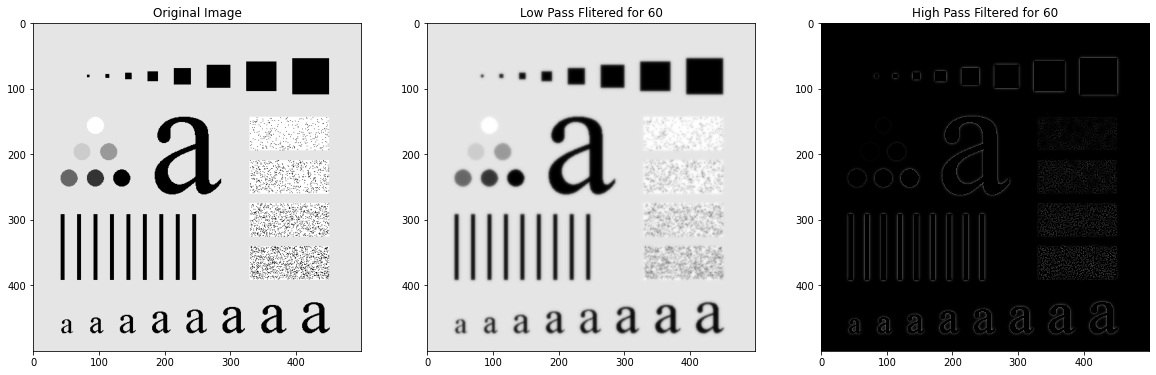

In [29]:
plt.figure(figsize=(20,20))
plt.subplot (1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")

plt.subplot(1, 3, 2)
plt.title('Low Pass Flitered for 60')
plt.imshow(BW_LPF_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title('High Pass Filtered for 60')
plt.imshow(BW_HPF_img, cmap='gray', vmin=0, vmax=255)

plt.show()

### Conclusion:

In this lab, I performed low pass filtering anc high pass filtering using butterworth and ideal and in doing so, i understood it's differences, such as the ring formations. Coding this without libraries along with changing the values helped helped me understand the method better because I could see how the changes affect the results.